## 0. Install and Import Dependencies

In [63]:
%pip install easyocr
%pip install imutils
%pip install geopy

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [64]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import codecs
import blah

In [65]:
b = blah.gui_fname()       # Used to get image from our system
string = codecs.decode(b, 'UTF-8')

## 1. Read in Image, Grayscale and Blur

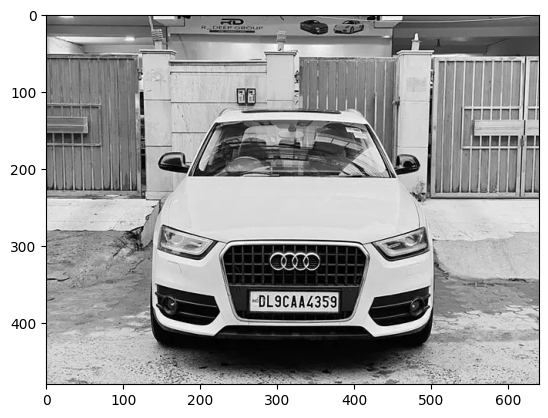

In [66]:
img = cv2.imread(string)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

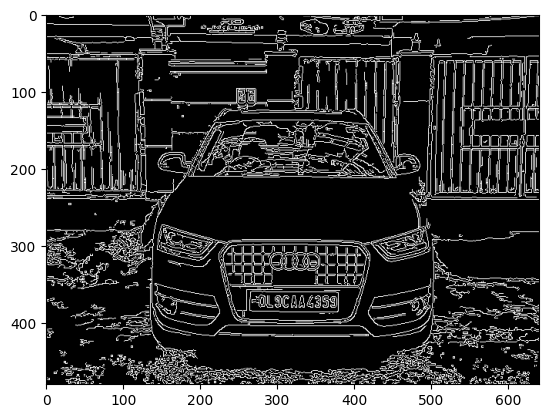

In [67]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction 11 17 17
edged = cv2.Canny(bfilter, 30, 200) #Edge detection algorithm 30
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [68]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [69]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) # 10
    if len(approx) == 4:
        location = approx
        break

In [70]:
location

array([[[265, 360]],

       [[267, 385]],

       [[379, 385]],

       [[376, 360]]], dtype=int32)

In [71]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

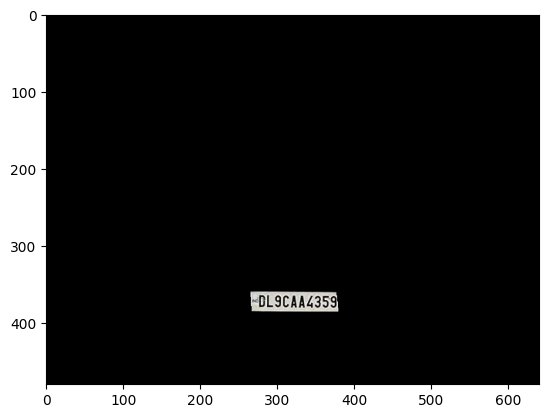

In [72]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [73]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

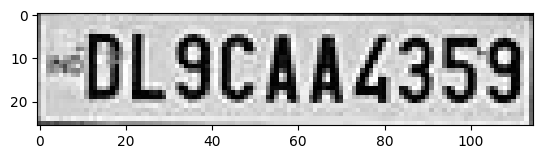

In [74]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [75]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [115, 0], [115, 26], [0, 26]], '~DL9CAAL359', 0.6858128104459617)]

## 5. Render Result

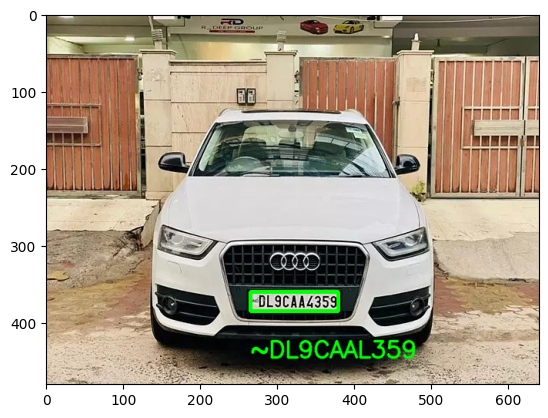

In [76]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [77]:
from geopy.geocoders import Nominatim
print(text[1],text[2])
text3="".join([text[1], text[2]])
# print(text[1],text[2])
loc = Nominatim(user_agent="GetLoc")
getLoc = loc.geocode(text3)
print(getLoc.address)
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

D L
Delhi, India
Latitude =  28.6273928 

Longitude =  77.1716954


In [78]:
print("The Lincence Plate number is: ", list(result)[0][1])

The Lincence Plate number is:  ~DL9CAAL359
